In [66]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix  

#***Data reading***

In [2]:
DataNames = ['employee_survey', 'general', 'manager_survey', 'retirement']

In [3]:
for df in DataNames:
  globals()[f'df_{df}'] = pd.read_csv(f'https://raw.githubusercontent.com/santiagogz11/HRProject/main/cleanData/df_{df}.csv', engine='python', sep=None, index_col=0)

In [4]:
# Convertir los tipos de variables al más apropiado
employeeSurveyColumns = {'EmployeeID':'string'}
df_employee_survey = df_employee_survey.astype(employeeSurveyColumns)

generalColumns = {'EmployeeID':'string'}
df_general = df_general.astype(generalColumns)

managerSurveyColumns = {'EmployeeID':'string'}
df_manager_survey = df_manager_survey.astype(managerSurveyColumns)

retirementColumns = {'EmployeeID':'string', 'retirementType':'string', 'resignationReason':'string'}
df_retirement = df_retirement.astype(retirementColumns)

df_retirement['retirementDate'] = pd.to_datetime(df_retirement['retirementDate'])

#***Visualization***

##***1. Employee survey***

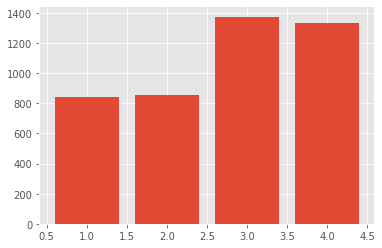

In [5]:
plt.bar(df_employee_survey.EnvironmentSatisfaction.value_counts().index, df_employee_survey.EnvironmentSatisfaction.value_counts().values)
plt.show()
# Aproximadamente el 40% de los empleados tienen una baja-media percepción del ambiente de trabajo

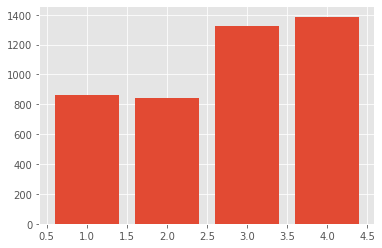

In [6]:
plt.bar(df_employee_survey.JobSatisfaction.value_counts().index, df_employee_survey.JobSatisfaction.value_counts().values)
plt.show()
# Aproximadamente el 40% de los empleados tienen una baja-media percepción con el empleo

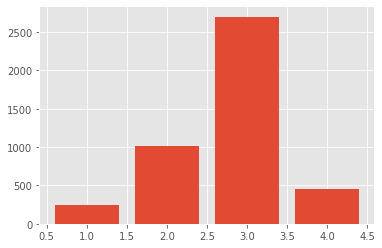

In [7]:
plt.bar(df_employee_survey.WorkLifeBalance.value_counts().index, df_employee_survey.WorkLifeBalance.value_counts().values)
plt.show()
# Aproximadamente el 30% de los empleados tienen un balance de vida-trabajo medio bueno

##***2. Manager survey***

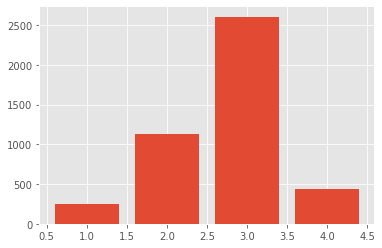

In [8]:
plt.bar(df_manager_survey.JobInvolvement.value_counts().index, df_manager_survey.JobInvolvement.value_counts().values)
plt.show()
# Aproximadamente el 30% de los empleados tienen una baja-media participación

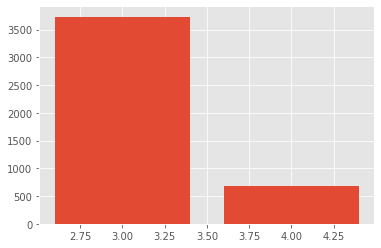

In [9]:
plt.bar(df_manager_survey.PerformanceRating.value_counts().index, df_manager_survey.PerformanceRating.value_counts().values)
plt.show()
# La mayoría de empleados tienen buen rendimiento

##***3. Retirement***

In [10]:
df_retirement.columns

Index(['EmployeeID', 'retirementDate', 'retirementType', 'resignationReason'], dtype='object')

In [28]:
df_retirement['month'] = df_retirement.retirementDate.dt.month

In [62]:
df = df_retirement.groupby(['month', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.bar(df, x='month', y='quantity', color='resignationReason', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [ ]:
df = pd.merge(df_general[['EmployeeID', 'Department']], df_retirement, on = 'EmployeeID', how = 'right')

In [ ]:
df = df.groupby(['Department', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})

In [ ]:
fig = px.sunburst(df, path=['resignationReason', 'Department'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [ ]:
fig = px.sunburst(df, path=['Department', 'resignationReason'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [82]:
df = pd.merge(df_general[['EmployeeID', 'MaritalStatus']], df_retirement, on = 'EmployeeID', how = 'right')

In [84]:
df = df.groupby(['MaritalStatus', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})

In [87]:
fig = px.sunburst(df, path=['resignationReason', 'MaritalStatus'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

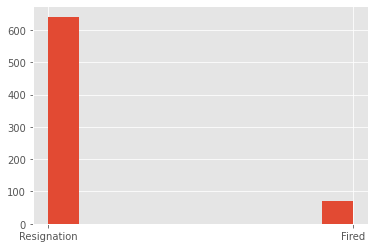

In [32]:
df_retirement.retirementType.hist()
plt.show()

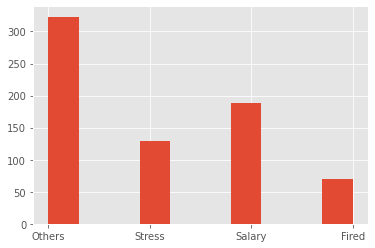

In [33]:
df_retirement.resignationReason.hist()
plt.show()

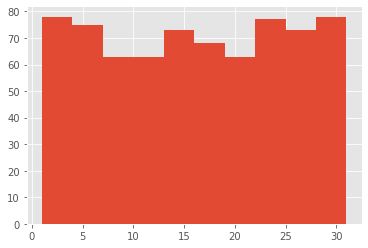

In [34]:
df_retirement.retirementDate.dt.day.hist()
plt.show()

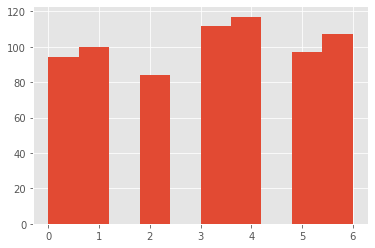

In [35]:
df_retirement.retirementDate.dt.day_of_week.hist()
plt.show()

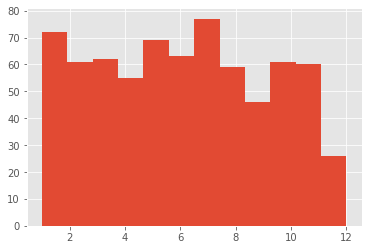

In [36]:
df_retirement.retirementDate.dt.month.hist(bins=12)
plt.show()

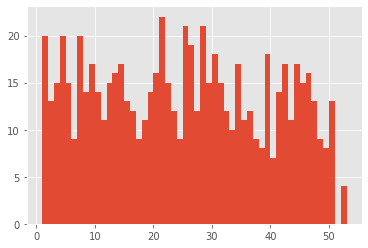

In [39]:
df_retirement.retirementDate.dt.isocalendar().week.hist(bins=52)
plt.show()

## ***4. General***

In [40]:
df_general.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

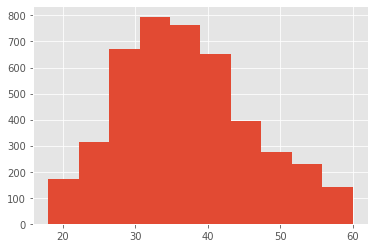

In [42]:
df_general.Age.hist()
plt.show()

In [65]:
df = df_general.groupby(['Department'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='Department', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [61]:
df = df_general.groupby(['BusinessTravel'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='BusinessTravel', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [64]:
df = df_general.groupby(['EducationField'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='EducationField', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [94]:
df = df_general.groupby(['Gender'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='Gender', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

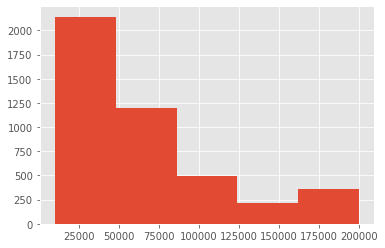

In [93]:
df_general.MonthlyIncome.hist(bins=5)
plt.show()